#### Amazinum. Logistic regression. Moisei. Task 5.

#### Load dataset

In [22]:
import os
import numpy as np
import matplotlib.pyplot as plt
import h5py # common package to interact with a dataset that is stored on an H5 file.
import scipy
# from PIL import Image
from scipy import ndimage
cwd= os.getcwd() # current working directory
path = os.path.join(cwd,'data') 

def load_dataset():
    file_name = os.path.join('train_catvnoncat.h5')
    train_dataset = h5py.File(file_name, "r")
    X_train = np.array(train_dataset["train_set_x"][:]) # your train set features
    Y_train = np.array(train_dataset["train_set_y"][:]) # your train set labels
    
    file_name = os.path.join('test_catvnoncat.h5')
    test_dataset = h5py.File(file_name, "r")
    X_test = np.array(test_dataset["test_set_x"][:]) # your test set features
    Y_test = np.array(test_dataset["test_set_y"][:]) # your test set labels

    classes = ['non-cat','cat']
    
    Y_train = Y_train.reshape(-1,1)
    Y_test = Y_test.reshape(-1,1)
    
    return X_train, Y_train, X_test, Y_test, classes

X_train, Y_train, X_test, Y_test, classes = load_dataset()

print ('X_train.shape= ',X_train.shape)
print ('X_test.shape= ',X_test.shape)
print ('Y_train.shape= ',Y_train.shape)
print ('Y_test.shape= ',Y_test.shape)

X_train.shape=  (209, 64, 64, 3)
X_test.shape=  (50, 64, 64, 3)
Y_train.shape=  (209, 1)
Y_test.shape=  (50, 1)


#### Check results

In [23]:
m_train, num_px,_,_ = X_train.shape
m_test = X_test.shape[0]

print ("Number of training examples: m_train = " + str(m_train))
print ("Number of testing examples: m_test = " + str(m_test))
print ("Height/Width of each image: num_px = " + str(num_px))
print ("Each image is of size: (" + str(num_px) + ", " + str(num_px) + ", 3)")

Number of training examples: m_train = 209
Number of testing examples: m_test = 50
Height/Width of each image: num_px = 64
Each image is of size: (64, 64, 3)


#### Review some examples of pictures

y = [1], it's a 'cat' picture.


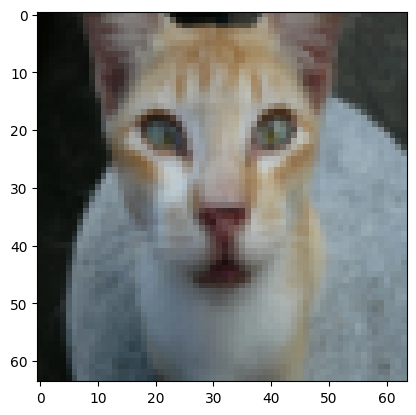

In [24]:
# Example of a picture
index = 11
plt.imshow(X_train[index])
print ("y = " + str(Y_train[index,:]) + ", it's a '" + classes[np.squeeze(Y_train[index,:])] +  "' picture.")

y = [0], it's a 'non-cat' picture.


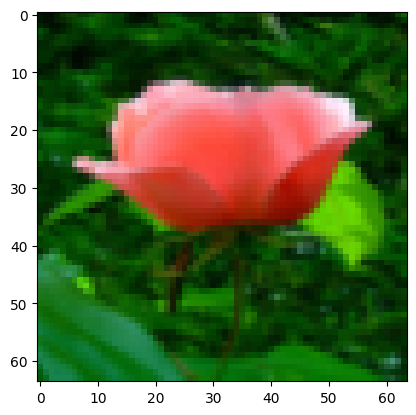

In [25]:
index = 3
plt.imshow(X_train[index])
print ("y = " + str(Y_train[index,:]) + ", it's a '" + classes[np.squeeze(Y_train[index,:])] +  "' picture.")

In [26]:
print ('Label 1 count:', np.sum(Y_train!=0))
print ('Label 0 count:', np.sum(Y_train==0))

Label 1 count: 72
Label 0 count: 137


#### Flatten features

In [27]:
X_train_flatten = X_train.reshape(m_train, -1)
X_test_flatten =  X_test.reshape(m_test, -1)

#### Check results

In [28]:
print ("train_set_x_flatten shape: {}".format(X_train_flatten.shape))
print ("test_set_x_flatten shape: {}".format(X_test_flatten.shape))
print ("sanity check after reshaping: {}".format(X_train_flatten[0, :5]))

train_set_x_flatten shape: (209, 12288)
test_set_x_flatten shape: (50, 12288)
sanity check after reshaping: [17 31 56 22 33]


#### Normalize features

In [29]:
X_train_scaled = X_train_flatten/255.
X_test_scaled = X_test_flatten/255.

#### Sigmoid function

In [30]:
def sigmoid(z):
    """
    Compute the sigmoid of z

    Arguments:
    z -- A scalar or numpy array of any size.

    Return:
    g -- sigmoid(z)
    """

    # YOUR_CODE. Implement sigmoid function
    # START_CODE 
    g = 1 / (1 + np.exp(-z))
    # END_CODE 
    
    return g

#### check results

In [31]:
print ("sigmoid([0, 2]) = " + str(sigmoid(np.array([0,2]))))

sigmoid([0, 2]) = [0.5        0.88079708]


#### Initialize parameters

In [32]:
def initialize_with_zeros(dim):
    """
    This function creates a vector of zeros of shape (1,dim) for w and initializes b to 0.
    
    Argument:
    dim -- size of the w vector we want (or number of parameters in this case)
    
    Returns:
    w -- initialized vector of shape (1,dim)
    b -- initialized scalar (corresponds to the bias)
    """
    
    # YOUR_CODE.  Initialize b to zero and w as a vector of zeros. 
    # START_CODE   
    w = np.zeros((1, dim))
    b = 0
    # END_CODE 

    assert(w.shape == (1, dim))
    assert(isinstance(b, float) or isinstance(b, int))
    
    return w, b

#### Check results

In [33]:
dim = 2
w, b = initialize_with_zeros(dim)
print ("w = " + str(w))
print ("b = " + str(b))

w = [[0. 0.]]
b = 0


#### Forward and Backward propagation

In [34]:
#### Forward and Backward propagation# GRADED FUNCTION: propagate

def propagate(w, b, X, Y, C=1):
    """
    Implement the cost function and its gradient for the propagation explained above

    Arguments:
    w -- weights, a numpy array of size (1,num_px * num_px * 3)
    b -- bias, a scalar
    X -- data of size (number of examples, num_px * num_px * 3)
    Y -- true "label" vector (containing 0 if non-cat, 1 if cat) of size (number of examples,1)

    Return:
    cost -- negative log-likelihood cost for logistic regression
    dw -- gradient of the loss with respect to w, thus same shape as w
    db -- gradient of the loss with respect to b, thus same shape as b
    
    """
    m = X.shape[0]
 
    # YOUR_CODE.  implement forward propagation 
    # START_CODE   
    Z=   b + X @ w.T # this is the same as np.dot
    A= sigmoid(Z) # compute activation    
    #     cost = -1/m *np.sum(Y* np.log(A) + (1-Y)* np.log(1-A)) # compute cost
    cost = -1/m *np.sum(Y* np.log(A) + (1-Y)* np.log(1-A))*C  + 1/(2*m) *np.sum(w**2)# compute cost
    
    # END_CODE 
    
    # YOUR_CODE.  Implement Backward propahation 
    # START_CODE   
    dJ_dw = 1/m * (A-Y).T @ X * C + 1/m * w
    dJ_db = 1/m * np.sum(A-Y)

   # END_CODE 

    assert(dJ_dw.shape == w.shape)
    assert(dJ_db.dtype == float)
    assert(cost.dtype == float)
    
    grads = {"dJ_dw": dJ_dw,
             "dJ_db": dJ_db}
    
    return grads, cost

#### Check result

In [35]:
w, b, X, Y = np.array([[1., 2.]]), 2., np.array([[1.,2.,-1.],[3.,4.,-3.2]]).T, np.array([[1,0,1]]).T
grads, cost = propagate(w, b, X, Y)
print ("dJ_dw = " + str(grads["dJ_dw"]))
print ("dJ_db = " + str(grads["dJ_db"]))
print ("cost = " + str(cost))

dJ_dw = [[1.33178935 3.06173906]]
dJ_db = 0.001455578136784208
cost = 6.6348786527278865


#### Optimization

In [36]:
def optimize(w, b, X, Y, num_iterations, learning_rate, C= 1, verbose = False):
    """
    This function optimizes w and b by running a gradient descent algorithm
    
    Arguments:
    w -- weights, a numpy array of size (1,num_px * num_px * 3)
    b -- bias, a scalar
    X -- data of size (number of examples, num_px * num_px * 3)
    Y -- true "label" vector (containing 0 if non-cat, 1 if cat) of size (number of examples,1)
    num_iterations -- number of iterations of the optimization loop
    learning_rate -- learning rate of the gradient descent update rule
    print_cost -- True to print the loss every 100 steps
    
    Returns:
    params -- dictionary containing the weights w and bias b
    grads -- dictionary containing the gradients of the weights and bias with respect to the cost function
    costs -- list of all the costs computed during the optimization, this will be used to plot the learning curve.
    """
   
    costs = [] # keep history for plotting if necessary 
    
    for i in range(num_iterations):        

    
        # YOUR_CODE.  Call to compute cost and gradient 
        # START_CODE   
        grads, cost = propagate(w, b, X, Y, C)
        # END_CODE 
        
        # Retrieve derivatives from grads
        dJ_dw = grads["dJ_dw"]
        dJ_db = grads["dJ_db"]
        
        # YOUR_CODE.  Update paramaters 
        # START_CODE   
        w = w - learning_rate * dJ_dw
        b = b - learning_rate * dJ_db
        # END_CODE 
        
        # Record the costs
        if i % 100 == 0:
            costs.append(cost)
        
        # Print the cost every 100 training iterations
        if verbose and i % 100 == 0:
            print ("Cost after iteration %i: %f" %(i, cost))
    
    params = {"w": w,
              "b": b}
    
    grads = {"dJ_dw": dJ_dw,
             "dJ_db": dJ_db}
    
    return params, grads, costs

#### Check result

In [37]:
#### Check resultparams, grads, costs = optimize(w, b, X, Y, num_iterations= 100, learning_rate = 0.009, verbose = False)

print ("w = " + str(params["w"]))
print ("b = " + str(params["b"]))
print ("dw = " + str(grads["dJ_dw"]))
print ("db = " + str(grads["dJ_db"]))

w = [[ 0.08006006 -0.02399336]]
b = 1.9060971483059892
dw = [[1.33178935 3.06173906]]
db = 0.001455578136784208


#### Predict

In [39]:
def predict(w, b, X):
    '''
    Predict whether the label is 0 or 1 using learned logistic regression parameters (w, b)
    
    Arguments:
    w - weights, a numpy array of size (1,num_px * num_px * 3)
    b - bias, a scalar
    X - data of size (number of examples, num_px * num_px * 3)
    
    Returns:
    Y_prediction - a numpy array of shape (number of examples, 1) containing all predictions (0/1) for the examples in X
    '''
    m,n = X.shape
    assert (w.shape==(1,n))
 
    # YOUR_CODE.  Compute "A" predicting the probabilities of a cat being present in the picture
    # START_CODE   
    A= sigmoid(b + X@ w.T)
    # END_CODE 

    # YOUR_CODE.  Convert probabilities to actual predictions 0 or 1 
    # START_CODE   
    v_pretict = np.vectorize(lambda x: 0 if x< 0.5 else 1)
    Y_prediction = v_pretict(A)
    # END_CODE 
    
    assert(Y_prediction.shape == (m, 1))
    
    return Y_prediction

#### Check results

In [40]:
w = np.array([[0.1124579],[0.23106775]]).T
b = -0.3
X = np.array([[1.,-1.1,-3.2],[1.2,2.,0.1]]).T
print ("predictions = \n{}".format (predict(w, b, X)))

predictions = 
[[1]
 [1]
 [0]]


#### Model

In [42]:
def model(X_train, Y_train, X_test, Y_test, num_iterations = 2000, learning_rate = 0.5, verbose = False, C= 1):
    """
    Builds the logistic regression model by calling the functions implemented previously
    
    Arguments:
    X_train -- training set represented by a numpy array of shape (number of examples, num_px * num_px * 3)
    Y_train -- training labels represented by a numpy array (vector) of shape (1, m_train)
    X_test -- test set represented by a numpy array of shape (num_px * num_px * 3, m_test)
    Y_test -- test labels represented by a numpy array (vector) of shape (number of examples,1)
    num_iterations -- hyperparameter representing the number of iterations to optimize the parameters
    learning_rate -- hyperparameter representing the learning rate used in the update rule of optimize()
    print_cost -- Set to true to print the cost every 100 iterations
    C- regularization parameter 
    
    Returns:
    res -- dictionary containing information about the model.
    """
    
    # YOUR_CODE.
    # START_CODE   

    #  initialize parameters
    dim = X_train.shape[1]
    w, b = initialize_with_zeros(dim)
    
    # run gradient descent 
    parameters, grads, costs = optimize(w, b, X_train, Y_train, num_iterations = num_iterations, learning_rate = learning_rate,C = C, verbose = verbose)
    
    # retrieve parameters w and b from dictionary "parameters"
    w = parameters["w"]
    b = parameters["b"]
    
    # predict test/train set examples
    Y_prediction_test = predict(w, b, X_test)
    Y_prediction_train = predict(w, b, X_train)
    # END_CODE 

    # Print train/test Errors
    print("train accuracy= {:.3%}".format(np.mean(Y_prediction_train == Y_train)))
    print("test accuracy= {:.3%}".format(np.mean(Y_prediction_test == Y_test)))
    
    res = {'costs': costs,
           'Y_prediction_test': Y_prediction_test, 
           'Y_prediction_train' : Y_prediction_train, 
           'w' : w, 
           'b' : b,
           'learning_rate' : learning_rate,
           'num_iterations': num_iterations,
           'C':C
          }
    
    return res

#### Check results

In [45]:
res = model(X_train= X_train_scaled,
            Y_train=Y_train, 
            X_test=X_test_scaled, 
            Y_test= Y_test, 
            num_iterations = 3000, 
            learning_rate = 0.005, 
            verbose = True,
            C= 0.3 # 0.6 is still overfitting,   0.3  is low value to keep the test accuracy ashigh as possible
           )

Cost after iteration 0: 0.207944
Cost after iteration 100: 0.171627
Cost after iteration 200: 0.158808
Cost after iteration 300: 0.149346
Cost after iteration 400: 0.141692
Cost after iteration 500: 0.135217
Cost after iteration 600: 0.129593
Cost after iteration 700: 0.124622
Cost after iteration 800: 0.120172
Cost after iteration 900: 0.116150
Cost after iteration 1000: 0.112486
Cost after iteration 1100: 0.109128
Cost after iteration 1200: 0.106034
Cost after iteration 1300: 0.103170
Cost after iteration 1400: 0.100508
Cost after iteration 1500: 0.098026
Cost after iteration 1600: 0.095704
Cost after iteration 1700: 0.093526
Cost after iteration 1800: 0.091479
Cost after iteration 1900: 0.089549
Cost after iteration 2000: 0.087728
Cost after iteration 2100: 0.086005
Cost after iteration 2200: 0.084372
Cost after iteration 2300: 0.082823
Cost after iteration 2400: 0.081351
Cost after iteration 2500: 0.079950
Cost after iteration 2600: 0.078615
Cost after iteration 2700: 0.077342
Cost

#### Visualize cost function changes 

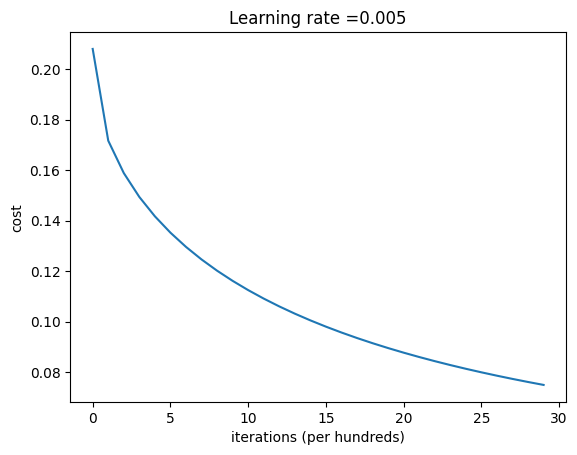

In [46]:
costs = np.squeeze(res['costs'])
plt.plot(costs)
plt.ylabel('cost')
plt.xlabel('iterations (per hundreds)')
plt.title("Learning rate =" + str(res["learning_rate"]))
plt.show()

#### Test with your image

image.size=  (64, 64)


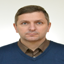

In [48]:
from PIL import Image
file_name=  os.path.join('Oleksiy.Tsebriy.jpg')
image = Image.open(file_name).resize((num_px,num_px))
print ('image.size= ', image.size)
image

In [49]:
my_image= np.array(image.getdata())
my_image.shape

(4096, 3)

In [50]:
my_image= my_image.reshape((1, num_px*num_px*3))
print ('my_image.shape=',my_image.shape)
my_image

my_image.shape= (1, 12288)


array([[227, 227, 217, ...,  43,  65,  96]])

In [51]:
my_predicted_image = predict(res["w"], res["b"], my_image)
my_predicted_image
print('y = {} , your algorithm predicts a {} picture.'.
      format(np.squeeze(my_predicted_image),classes[np.squeeze(my_predicted_image)]))

y = 0 , your algorithm predicts a non-cat picture.


C:\Users\Evolu\AppData\Local\Programs\Python\Python37\lib\site-packages\ipykernel_launcher.py:14: RuntimeWarning: overflow encountered in exp
  


image.size=  (64, 64)


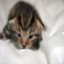

In [53]:
file_name=  os.path.join('test_cat.jpg')
image = Image.open(file_name).resize((num_px,num_px))
print ('image.size= ', image.size)
image

In [54]:
my_image= np.array(image.getdata())[:,:3] # by unknown reason it is 4 channels 
print ('my_image.shape=', my_image.shape)
my_image= my_image.reshape((1, num_px*num_px*3))
print ('after reshape: my_image.shape=',my_image.shape)
my_predicted_image = predict(res["w"], res["b"], my_image)

print('y = {} , your algorithm predicts a {} picture.'.
      format(np.squeeze(my_predicted_image),classes[np.squeeze(my_predicted_image)]))


my_image.shape= (4096, 3)
after reshape: my_image.shape= (1, 12288)
y = 1 , your algorithm predicts a cat picture.


#### Sklearn for brest cancer dataset

##### Logistic regression for load_breast_cancer

In [55]:
%matplotlib notebook

import matplotlib.pyplot as plt
import pandas as pd 
import numpy as np 
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_breast_cancer
from sklearn.linear_model import LogisticRegression

# import load_breast_cancer and get the X_cancer, y_cancer
cancer = load_breast_cancer()
(X_cancer, y_cancer)= load_breast_cancer(return_X_y = True) 

#  split to train and test using random_state = 0
X_train, X_test, y_train, y_test = train_test_split(X_cancer, y_cancer, random_state = 0)
#  train LogisticRegression classifier  for max_iter= 10000
clf = LogisticRegression(max_iter = 10000).fit(X_cancer, y_cancer)
print('\nBreast cancer dataset')
print ('X_cancer.shape= {}'.format(X_cancer.shape))
print('Accuracy of Logistic regression classifier on training set: {:.2f}'
     .format(clf.score(X_train, y_train)))
print('Accuracy of Logistic regression classifier on test set: {:.2f}'
     .format(clf.score(X_test, y_test)))


Breast cancer dataset
X_cancer.shape= (569, 30)
Accuracy of Logistic regression classifier on training set: 0.95
Accuracy of Logistic regression classifier on test set: 0.97
